<a href="https://colab.research.google.com/github/maossand/packed_fruits/blob/main/fruits_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split



import os #for creating directories
import shutil #for copying images to new folders
from multiprocessing import Pool
from tqdm import tqdm  # Progress bar for visibility


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Clone your Git repository: Use the following command to clone your Git repository into the Colab environment.

# !git clone https://github.com/maossand/packed_fruits.git

Cloning into 'packed_fruits'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 352.19 KiB | 1.17 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
%cd packed_fruits

/content/packed_fruits


In [ ]:
!ls

packed_fruit_EDA.ipynb	packed_fruit_model.ipynb  README.md


# Import Dataframe

In [3]:
#Import DF
os.chdir('/content/drive/MyDrive/packed_fruits/fruit_packed_data/')
df_varieties = pd.read_csv('df_cnn.csv')

In [4]:
batch_1 = ['apple_golden', 'apple_granny', 'apple_spartan', 'tomato_cherry_red',
           'tomato_cherry_yellow', 'tangerine_tangerine', 'lemon_yellow',
           'banana_yellow', 'apple_fuji', 'pepper_sweet_red', 'pepper_sweet_green'
           'tomato_bull_heart', 'orange_orange']

df_varieties = df_varieties[df_varieties['variety'].isin(batch_1)].copy()


In [5]:
labels = df_varieties['variety'].unique()
labels_to_int = {label: idx for idx, label in enumerate(labels)}
df_varieties['label'] = df_varieties['variety'].map(labels_to_int)

In [22]:
!ls

df_cnn.csv						segmentation_train
filtered_test						taxonomy.csv
filtered_train						test
packed-fruits-and-vegetables-recognition-benchmark.zip	train
segmentation_test					variety_classification.csv


# Create Folders for Images Subset

In [12]:
# #Function to copy a single file

# # Create new folders
# base_path = "/content/drive/MyDrive/packed_fruits/fruit_packed_data/"
# filtered_train = os.path.join(base_path, "filtered_train/")
# filtered_test = os.path.join(base_path, "filtered_test/")
# os.makedirs(filtered_train, exist_ok=True)
# os.makedirs(filtered_test, exist_ok=True)

# #Split the df

# df_varieties_train = df_varieties[df_varieties['subset'] == 'train']
# df_varieties_test = df_varieties[df_varieties['subset'] == 'test']

# #FOR TRAIN

# #This is NOT a fast approach

# def copy_file_train(row):
#     src = os.path.join(base_path, row["image_path"])
#     dst = os.path.join(filtered_train, os.path.basename(row["image_path"]))

#     if os.path.exists(src) and not os.path.exists(dst):  # Copy only if missing
#         shutil.copy(src, dst)
#         return f"✅ Copied: {src} → {dst}"
#     elif not os.path.exists(src):
#         return f"⚠️ Source file missing: {src}"
#     else:
#         return f"🚀 Already exists, skipping: {dst}"

# # Function to copy images in parallel with a progress bar
# def copy_images_parallel_train(df, num_workers=7):
#     with Pool(num_workers) as p:
#         results = list(tqdm(p.imap(copy_file_train, [row for _, row in df.iterrows()]), total=len(df)))

#     for res in results:
#         print(res)

# #FOR TEST

# def copy_file_test(row):
#     src = os.path.join(base_path, row["image_path"])
#     dst = os.path.join(filtered_test, os.path.basename(row["image_path"]))

#     if os.path.exists(src) and not os.path.exists(dst):  # Copy only if missing
#         shutil.copy(src, dst)
#         return f"✅ Copied: {src} → {dst}"
#     elif not os.path.exists(src):
#         return f"⚠️ Source file missing: {src}"
#     else:
#         return f"🚀 Already exists, skipping: {dst}"

# # Function to copy images in parallel with a progress bar
# def copy_images_parallel_test(df, num_workers=7):
#     with Pool(num_workers) as p:
#         results = list(tqdm(p.imap(copy_file_test, [row for _, row in df.iterrows()]), total=len(df)))

#     for res in results:
#         print(res)

In [ ]:
# # Run the parallel copy with progress tracking
# print("📂 Copying train images in parallel...")
# #copy_images_parallel_train(df_varieties_train, num_workers=7)  # Adjust workers based on CPU power

# print("✅ Parallel Copy Completed!")

In [26]:
# # Run the parallel copy with progress tracking
# print("📂 Copying test images in parallel...")
# #copy_images_parallel_test(df_varieties_test, num_workers=7)  # Adjust workers based on CPU power

# print("✅ Parallel Copy Completed!")

In [11]:
# #Check if images were filtered correctly

# # Define folder paths
# filtered_train_folder = "/content/drive/MyDrive/packed_fruits/fruit_packed_data/filtered_train/"
# filtered_test_folder = "/content/drive/MyDrive/packed_fruits/fruit_packed_data/filtered_test/"

# # Get expected filenames from DataFrames
# expected_train_files = set(df_varieties_train["file_name"])
# expected_test_files = set(df_varieties_test["file_name"])

# # Get actual filenames in the folders
# actual_train_files = set(os.listdir(filtered_train_folder))
# actual_test_files = set(os.listdir(filtered_test_folder))

# # Find extra files in each folder (should not be there)
# extra_train_files = actual_train_files - expected_train_files
# extra_test_files = actual_test_files - expected_test_files

# # Find missing files in each folder (should be there but are not)
# missing_train_files = expected_train_files - actual_train_files
# missing_test_files = expected_test_files - actual_test_files

# # Print results
# print(f"📂 TRAIN FOLDER: {len(actual_train_files)}/{len(expected_train_files)} images present")
# print(f"🔍 Extra train files: {len(extra_train_files)}")
# print(f"🔍 Missing train files: {len(missing_train_files)}\n")

# print(f"📂 TEST FOLDER: {len(actual_test_files)}/{len(expected_test_files)} images present")
# print(f"🔍 Extra test files: {len(extra_test_files)}")
# print(f"🔍 Missing test files: {len(missing_test_files)}\n")

# # If issues are found, print some examples
# if extra_train_files:
#     print(f"⚠️ Extra files in TRAIN folder (first 5 shown): {list(extra_train_files)[:5]}")

# if missing_train_files:
#     print(f"⚠️ Missing files in TRAIN folder (first 5 shown): {list(missing_train_files)[:5]}")

# if extra_test_files:
#     print(f"⚠️ Extra files in TEST folder (first 5 shown): {list(extra_test_files)[:5]}")

# if missing_test_files:
#     print(f"⚠️ Missing files in TEST folder (first 5 shown): {list(missing_test_files)[:5]}")


📂 TRAIN FOLDER: 38308/38308 images present
🔍 Extra train files: 0
🔍 Missing train files: 0

📂 TEST FOLDER: 12636/12636 images present
🔍 Extra test files: 0
🔍 Missing test files: 0



# Multi task learning

### Packed or not: binary classification -> sigmoid activation

### Fruit type: multiclass classification -> softmax activation

### Fruit count: regression -> linear activation

### Possible base models: MobileNetV2, ResNet50, EfficientNet

#### In base models the lower layers (feature extractor) detect basic image features, such as edges and shapes. The upper layers (classification head) are task-specific, such as fruit type, package presence, etc.

## MobileNetV2

In [6]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model

#Load basemodel without the Classification Head

base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the base model, because we only train our custom classifier

base_model.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Adding classification heads

In [7]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Flatten feature maps into a single vector

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.3)(x)  # Regularization to prevent overfitting

# 1. Bag detection (binary classification)

output_packed = Dense(1, activation="sigmoid", name="packed")(x)

# 2. Variety type (multiclass)

output_variety = Dense(len(labels), activation="softmax", name="variety")(x)

# 3. Fruit count (regression)

output_count = Dense(1, activation="linear", name="count")(x)

# Create the multi-output model

model = Model(inputs=base_model.input, outputs=[output_packed, output_variety, output_count])

# Summary

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,273,356 (8.67 MB)

 Trainable params: 15,372 (60.05 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Compile the model

In [8]:
from tensorflow.keras.optimizers import Adam

# Compile the model with multiple losses
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Adjust learning rate as needed
    loss={
        "packed": "binary_crossentropy",
        "variety": "sparse_categorical_crossentropy",
        "count": "mse",
    },
    metrics={
        "packed": "accuracy",
        "variety": "accuracy",
        "count": "mae",  # Mean Absolute Error for counting
    }
)

print("✅ Model Compiled Successfully!")


✅ Model Compiled Successfully!


### Load and Preprocess Images

In [9]:
df_varieties

,variety,layout_id,packed,amount,simp_amount,weight,uniform_background,crowd,image_path,file_name,subset,full_date,label
0,apple_golden,19379,0,1,1,128,1,0,test/apple_golden/002344.jpg,002344.jpg,test,2022-06-10,0
1,apple_golden,19379,0,1,1,128,1,0,test/apple_golden/001584.jpg,001584.jpg,test,2022-06-10,0
2,apple_golden,19379,0,1,1,128,1,0,test/apple_golden/003672.jpg,003672.jpg,test,2022-06-10,0
3,apple_golden,19379,0,1,1,128,1,0,test/apple_golden/076863.jpg,076863.jpg,test,2022-06-10,0
4,apple_golden,19392,0,1,1,130,1,0,train/apple_golden/039047.jpg,039047.jpg,train,2022-06-10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531,tomato_cherry_yellow,8730,0,1,1,6,1,0,train/tomato_cherry_yellow/051260.jpg,051260.jpg,train,2022-05-20,9
42532,tomato_cherry_yellow,8728,1,1,1,6,1,0,train/tomato_cherry_yellow/043137.jpg,043137.jpg,train,2022-05-20,9
42533,tomato_cherry_yellow,8728,1,1,1,6,1,0,train/tomato_cherry_yellow/017965.jpg,017965.jpg,train,2022-05-20,9
42534,tomato_cherry_yellow,8728,1,1,1,6,1,0,train/tomato_cherry_yellow/039801.jpg,039801.jpg,train,2022-05-20,9


In [40]:
#Fix the image path

df_varieties['image_path'] = df_varieties['subset'] + '_' + df_varieties['variety'] + '/' + df_varieties['file_name']

#Split the DF

df_varieties_train = df_varieties[df_varieties['subset'] == 'train']
df_varieties_test = df_varieties[df_varieties['subset'] == 'test']

# Ensure df_train and df_test are full copies (not views)
df_train = df_varieties_train[['image_path', 'layout_id', 'label', 'packed', 'amount']].copy() #We use layout_id to create validation set
df_test = df_varieties_test[['image_path', 'label', 'packed', 'amount']].copy()

# Define dataset paths
filtered_train_folder = "/content/resized_dataset/train/train_batch_1_resized/"
filtered_test_folder = "/content/resized_dataset/test/test_batch_1_resized/"

# Correctly update file paths
df_train["file_path"] = df_train["image_path"].apply(lambda x: os.path.join(filtered_train_folder, x))
df_test["file_path"] = df_test["image_path"].apply(lambda x: os.path.join(filtered_test_folder, x))

In [41]:
#Extract train_dataset

import os
import zipfile

# Define train ZIP path in Google Drive
drive_train_zip = "/content/drive/MyDrive/packed_fruits/fruit_packed_data/resized_images/train_batch_1_resized/train_batch_1_resized.zip"

# Define local extraction folder
local_train_folder = "/content/resized_dataset/train/"

# Create folder if it doesn’t exist
os.makedirs(local_train_folder, exist_ok=True)

# Extract ZIP file
with zipfile.ZipFile(drive_train_zip, 'r') as zip_ref:
    zip_ref.extractall(local_train_folder)

print(f"✅ Train dataset extracted to {local_train_folder}")


✅ Train dataset extracted to /content/resized_dataset/train/


In [42]:
# Define test ZIP path in Google Drive
drive_test_zip = "/content/drive/MyDrive/packed_fruits/fruit_packed_data/resized_images/test_batch_1_resized/test_batch_1_resized.zip"

# Define local extraction folder
local_test_folder = "/content/resized_dataset/test/"

# Create folder if it doesn’t exist
os.makedirs(local_test_folder, exist_ok=True)

# Extract ZIP file
with zipfile.ZipFile(drive_test_zip, 'r') as zip_ref:
    zip_ref.extractall(local_test_folder)

print(f"✅ Test dataset extracted to {local_test_folder}")


✅ Test dataset extracted to /content/resized_dataset/test/


In [43]:
import os

# Define train dataset path
train_folder = "/content/resized_dataset/train/"

# Function to display folder structure
def list_files(startpath, max_depth=2):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, "").count(os.sep)
        if level >= max_depth:
            continue  # Limit depth of displayed structure

        indent = " " * 4 * (level)
        print(f"{indent}📂 {os.path.basename(root)}/")

        subindent = " " * 4 * (level + 1)
        for f in files[:5]:  # Show only first 5 files per folder
            print(f"{subindent}📄 {f}")
        if len(files) > 5:
            print(f"{subindent}... ({len(files) - 5} more files)")

# Display folder structure
list_files(train_folder)

📂 /
📂 train_batch_1_resized/
    📂 train_lemon_yellow/
        📄 080259.jpg
        📄 037536.jpg
        📄 097293.jpg
        📄 030309.jpg
        📄 043749.jpg
        ... (963 more files)
    📂 train_banana_yellow/
        📄 028933.jpg
        📄 050609.jpg
        📄 030619.jpg
        📄 056475.jpg
        📄 039866.jpg
        ... (1211 more files)
    📂 train_tomato_bull_heart/
        📄 038508.jpg
        📄 003292.jpg
        📄 021455.jpg
        📄 045136.jpg
        📄 019145.jpg
        ... (1479 more files)
    📂 train_tomato_cherry_yellow/
        📄 100879.jpg
        📄 023869.jpg
        📄 067956.jpg
        📄 020725.jpg
        📄 012539.jpg
        ... (1535 more files)
    📂 train_tomato_cherry_red/
        📄 070962.jpg
        📄 077819.jpg
        📄 027035.jpg
        📄 064695.jpg
        📄 034124.jpg
        ... (1215 more files)
    📂 train_apple_granny/
        📄 048528.jpg
        📄 068384.jpg
        📄 030107.jpg
        📄 084386.jpg
        📄 059393.jpg
        ... (1559

### Split Train Validation

In [52]:
#Split the training set

from sklearn.model_selection import train_test_split

# Get unique layout IDs and associated labels
layout_df = df_train.groupby("layout_id")["label"].first().reset_index()

# Stratified split based on label distribution
train_layouts, val_layouts = train_test_split(
    layout_df["layout_id"], test_size=0.3, stratify=layout_df["label"], random_state=42
)


num_classes = len(df_train["label"].unique())
print(f"✅ Number of classes: {num_classes}")


# Extract train and validation data based on layout_id
df_train = df_train[df_train["layout_id"].isin(train_layouts)].copy()
df_val = df_train[df_train["layout_id"].isin(val_layouts)].copy()

print(f"✅ Train Layouts: {len(train_layouts)}, Validation Layouts: {len(val_layouts)}")
print(f"✅ Training samples: {len(df_train)}, Validation samples: {len(df_train)}")


✅ Number of classes: 10
✅ Train Layouts: 1678, Validation Layouts: 720
✅ Training samples: 6712, Validation samples: 6712


### Load and preprocess image

In [53]:
import tensorflow as tf

# Fixed Image Preprocessing Function
def load_and_preprocess_image(file_path, packed_label, fruit_label, amount):
    # Load raw image file (string format)
    image_raw = tf.io.read_file(file_path)

    # Extract shape before decoding (avoids unnecessary processing)
    image_shape = tf.image.extract_jpeg_shape(image_raw)  # Returns (height, width, channels)

    # Decode image only once (for both cases)
    image = tf.image.decode_jpeg(image_raw, channels=3)

    # Resize only if the image is NOT already 224x224
    image = tf.cond(
        tf.reduce_all(tf.equal(image_shape[:2], (224, 224))),  # Check if size is already 224x224
        lambda: tf.image.convert_image_dtype(image, tf.float32),  # Just normalize if correct size
        lambda: tf.image.resize(image, (224, 224)) / 255.0  # Resize + Normalize
    )

    # Convert labels
    packed_label = tf.cast(packed_label, tf.float32)  # Binary (Bag/No Bag)
    amount = tf.cast(amount, tf.float32)  # Regression (Fruit Count)

    return image, (packed_label, fruit_label, amount)

### Create tensorflow dataset

In [54]:
# Function to create TensorFlow dataset
def create_dataset(df):
    dataset = tf.data.Dataset.from_tensor_slices((
        tf.constant(df["file_path"].values, dtype=tf.string),  # Ensure paths are tf.string
        tf.constant(df["packed"].values, dtype=tf.float32),  # Ensure labels are float32
        tf.constant(df["label"].values, dtype=tf.int32),  # Ensure labels are int32
        tf.constant(df["amount"].values, dtype=tf.float32)  # Ensure amounts are float32
    ))

    # Apply preprocessing function
    dataset = dataset.map(lambda f, p, l, a: load_and_preprocess_image(f, p, l, a),
                          num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # Shuffle, batch, and prefetch for efficiency
    dataset = dataset.shuffle(1000).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

    return dataset

# Re-create train and test datasets
train_dataset = create_dataset(df_train)
val_dataset = create_dataset(df_val)
test_dataset = create_dataset(df_test)

print("✅ Train and Test Datasets Successfully Created!")

✅ Train and Test Datasets Successfully Created!


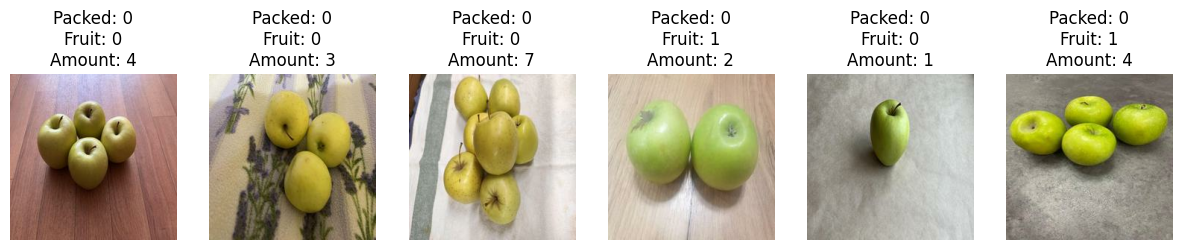

In [55]:
import matplotlib.pyplot as plt

# Function to display a batch of images with labels
def show_sample_images(dataset, num_images=6):
    # Take one batch
    for images, labels in dataset.take(1):
        packed_labels, fruit_labels, amount_labels = labels  # Unpack labels

        # Convert one-hot fruit labels back to integers
        # The fruit_labels are already integers, no need for argmax
        fruit_labels = fruit_labels.numpy()

        # Create a figure
        fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
        for i in range(num_images):
            axes[i].imshow(images[i].numpy())  # Convert tensor to numpy array
            axes[i].axis("off")
            axes[i].set_title(f"Packed: {int(packed_labels[i].numpy())}\n"
                              f"Fruit: {fruit_labels[i]}\n"
                              f"Amount: {int(amount_labels[i].numpy())}")
        plt.show()
        break  # Stop after one batch

# Show sample images from train dataset
show_sample_images(train_dataset)

# Model Training

In [56]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
)

Epoch 1/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - count_loss: 2.2013 - count_mae: 1.1410 - loss: 2.4011 - packed_accuracy: 0.9860 - packed_loss: 0.0386 - variety_accuracy: 0.9417 - variety_loss: 0.1611
Epoch 2/10
  1/210 ━━━━━━━━━━━━━━━━━━━━ 29s 140ms/step - count_loss: 1.1425 - count_mae: 0.8351 - loss: 1.6541 - packed_accuracy: 1.0000 - packed_loss: 8.1378e-04 - variety_accuracy: 0.8750 - variety_loss: 0.5108

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - count_loss: 2.1355 - count_mae: 1.1281 - loss: 2.3082 - packed_accuracy: 0.9883 - packed_loss: 0.0364 - variety_accuracy: 0.9516 - variety_loss: 0.1363
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - count_loss: 2.1314 - count_mae: 1.1336 - loss: 2.2859 - packed_accuracy: 0.9884 - packed_loss: 0.0325 - variety_accuracy: 0.9612 - variety_loss: 0.1220
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - count_loss: 2.1232 - count_mae: 1.1315 - loss: 2.2902 - packed_accuracy: 0.9896 - packed_loss: 0.0327 - variety_accuracy: 0.9562 - variety_loss: 0.1343
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - count_loss: 2.1225 - count_mae: 1.1367 - loss: 2.2744 - packed_accuracy: 0.9876 - packed_loss: 0.0307 - variety_accuracy: 0.9598 - variety_loss: 0.1211
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - count_loss: 2.2107 - count_mae: 1.1491 - loss: 2.3573 - packed_accuracy: 0.9888 - packed_loss: 0.0324 - variety_accuracy: 0.9595

### Display Sample Images

In [25]:
print("🔍 Training History Keys:", history.history.keys())

🔍 Training History Keys: dict_keys(['count_loss', 'count_mae', 'loss', 'packed_accuracy', 'packed_loss', 'variety_accuracy', 'variety_loss'])


In [27]:
num_val_batches = len(list(val_dataset))
num_val_batches

0

In [29]:

# Show first few rows
print(df_val.head())


Empty DataFrame
Columns: [image_path, layout_id, label, packed, amount, file_path]
Index: []
